In [1]:
# Imports from python packages
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import N_A

# Imports from my packages (see the folder called utils)
sys.path.append('../../utils/')
from betheheitler import dif_cs_sp, dif_cs_dp
from screening import Fermi_length, fit_More_zstar

# Style of the plot
plt.style.use('../../utils/minimal.style')
from helper_plots import ticks_real

In [2]:
# Physical parameters
Z = 29
Lf = Fermi_length(Z)

In [3]:
# Provide details on the plasma density
A = 63.546
rho = 8.96 # g/cm^3
ni = 1.e6 * N_A * rho / A # /m^3

# Provide details on the plasma temperature
Tplasma = [0., 0.1, 10.]

# Deduce the ionization degree
Zstar = np.array([ fit_More_zstar(Z, A, rho, T) for T in Tplasma ])
N = len(Tplasma)

In [4]:
Ng = 100
axis_norm = np.linspace(0., 1., Ng)

In [5]:
# For 10 MeV photons
k = 10 / 0.511
axis_gp = axis_norm * (k - 2.) + 1.
cs_10_MeV = np.zeros([N,Ng])
for i in range(N):
    cs_10_MeV[i] = np.array([ dif_cs_dp(Z, gp, k, Lf, Tplasma[i], ni, Zstar[i]) for gp in axis_gp ])

In [6]:
# For 100 MeV photons
k = 100 / 0.511
axis_gp = axis_norm * (k - 2.) + 1.
cs_100_MeV = np.zeros([N,Ng])
for i in range(N):
    cs_100_MeV[i] = np.array([ dif_cs_dp(Z, gp, k, Lf, Tplasma[i], ni, Zstar[i]) for gp in axis_gp ])

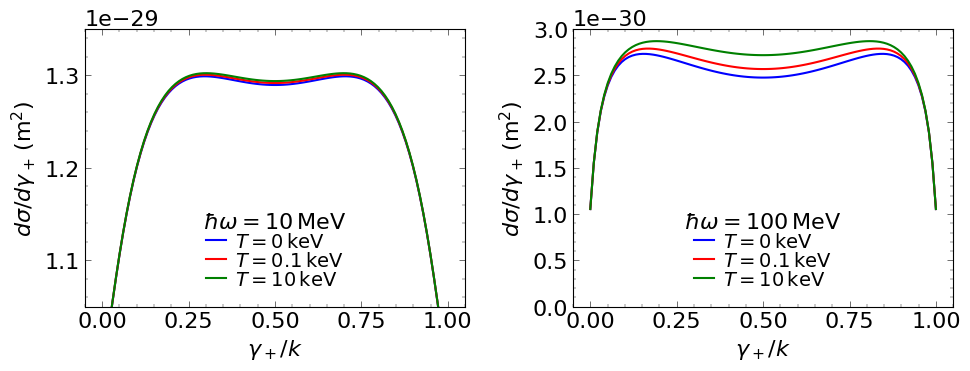

In [8]:
cc=['b','r','g']
labels=[r"$0$", r"$0.1$", r"$10$"]

# Figure
fig, axs = plt.subplots(1, 2, figsize=(10,4))

ax0=axs[0]
for i in range(N):
    ax0.plot(axis_norm, cs_10_MeV[i], c=cc[i], label=r"$T=$" + labels[i]+r"$ \, \rm keV$")
ax0.set_xlabel(r"$ \gamma_+/k $")
ax0.set_ylabel(r"$ d\sigma/d\gamma_+ \, \rm (m^2) $")
ax0.set_ylim([1.05e-29, 1.35e-29])
ax0.legend(loc='best', ncol=1, title=r"$ \hbar \omega = 10 \, \rm MeV$")

ax1=axs[1]
for i in range(N):
    ax1.plot(axis_norm, cs_100_MeV[i], c=cc[i], label=r"$T=$" + labels[i]+r"$ \, \rm keV$")
ax1.set_xlabel(r"$ \gamma_+/k $")
ax1.set_ylabel(r"$ d\sigma/d\gamma_+ \, \rm (m^2) $")
ax1.set_ylim([0., 3.e-30])
ax1.legend(loc='best', ncol=1, title=r"$ \hbar \omega = 100 \, \rm MeV$")

plt.tight_layout()

plt.show()